In [1]:
import mne
import fooof
import numpy as np
import os.path as op
import pickle
import saflow
from saflow import FS_SUBJDIR, DATA_ROOT
import os.path as op
import pickle as pkl
import numpy as np
import pandas as pd
import os
import mne_bids
import mne
from sklearn.model_selection import permutation_test_score, LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import fooof
from statsmodels.stats.multitest import fdrcorrection
import random
from matplotlib.backends.backend_pdf import PdfPages
from saflow.utils import create_fnames, get_meg_picks_and_info
from saflow.neuro import average_bands
from saflow.data import balance_data, load_fooof_data, load_subjlevel_fooofs
from saflow.visualization import grid_topoplot
from saflow.stats import singlefeat_classif, simple_contrast, mask_pvals, apply_tmax, subject_contrast
import os



/tmp/ipykernel_3093/3558032280.py:2: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  import fooof


In [2]:
region_names = ['isthmuscingulate_2-rh',
 'precuneus_2-rh',
 'precuneus_3-rh',
 'pericalcarine_3-lh',
 'lingual_5-lh',
 'lingual_6-lh',
 'lingual_7-rh',
 'pericalcarine_1-rh',
 'lingual_6-rh',
 'precuneus_11-lh',
 'isthmuscingulate_3-lh',
 'precuneus_4-rh',
 'cuneus_1-rh',
 'precuneus_1-rh',
 'isthmuscingulate_2-lh',
 'precuneus_10-lh',
 'unknown-lh',
 'postcentral_1-rh',
 'precentral_1-rh',
 'precentral_2-rh',
 'parsopercularis_3-rh',
 'precentral_16-lh',
 'postcentral_14-lh',
 'precentral_3-rh',
 'supramarginal_9-rh',
 'postcentral_2-rh',
 'postcentral_13-lh',
 'caudalmiddlefrontal_5-rh',
 'rostralmiddlefrontal_1-rh',
 'superiorfrontal_12-lh',
 'precentral_9-lh',
 'precentral_4-lh',
 'caudalmiddlefrontal_6-lh',
 'superiorfrontal_17-lh',
 'superiorfrontal_7-rh',
 'superiorfrontal_9-rh',
 'caudalmiddlefrontal_5-lh',
 'superiorfrontal_6-rh',
 'superiorfrontal_8-rh',
 'superiorfrontal_13-lh',
 'superiorfrontal_10-rh',
 'superiorfrontal_13-rh',
 'superiorfrontal_11-lh',
 'superiorfrontal_9-lh',
 'superiorfrontal_6-lh',
 'superiorfrontal_10-lh',
 'inferiorparietal_8-rh',
 'inferiorparietal_9-rh',
 'inferiorparietal_4-rh',
 'inferiorparietal_5-rh',
 'inferiorparietal_5-lh',
 'inferiorparietal_4-lh',
 'middletemporal_1-lh',
 'inferiorparietal_10-rh',
 'inferiorparietal_11-rh',
 'inferiorparietal_3-lh',
 'lateraloccipital_8-lh',
 'fusiform_8-rh',
 'entorhinal_1-rh',
 'inferiortemporal_2-rh',
 'unknown-rh',
 'inferiortemporal_1-rh',
 'inferiortemporal_1-lh',
 'fusiform_8-lh',
 'temporalpole_1-lh',
 'parstriangularis_3-rh',
 'parsorbitalis_1-rh',
 'parstriangularis_1-lh',
 'parstriangularis_2-lh',
 'fusiform_3-rh',
 'inferiortemporal_6-rh',
 'inferiortemporal_6-lh',
 'fusiform_4-lh',
 'fusiform_3-lh',
 'fusiform_2-lh',
 'inferiortemporal_5-lh',
 'lateraloccipital_10-rh',
 'lateraloccipital_7-rh',
 'inferiortemporal_4-lh',
 'fusiform_4-rh',
 'fusiform_6-lh',
 'fusiform_5-lh',
 'inferiortemporal_5-rh',
 'fusiform_6-rh',
 'inferiortemporal_3-lh',
 'fusiform_7-lh',
 'inferiortemporal_4-rh',
 'fusiform_7-rh',
 'inferiortemporal_3-rh',
 'inferiortemporal_2-lh',
 'parahippocampal_3-rh',
 'superiorparietal_11-rh',
 'lateraloccipital_1-rh',
 'inferiorparietal_12-rh',
 'precuneus_5-lh',
 'superiorparietal_9-lh',
 'superiorparietal_8-lh',
 'superiorparietal_11-lh',
 'superiorparietal_10-lh',
 'precuneus_4-lh',
 'precuneus_6-rh',
 'precuneus_5-rh',
 'precuneus_8-rh',
 'pericalcarine_1-lh',
 'pericalcarine_2-lh',
 'lateraloccipital_1-lh',
 'superiorparietal_14-lh',
 'superiorparietal_12-lh',
 'lateraloccipital_2-lh',
 'superiorparietal_13-rh',
 'superiorparietal_12-rh',
 'precuneus_8-lh',
 'precuneus_7-lh',
 'precuneus_6-lh',
 'precuneus_9-lh',
 'superiorparietal_13-lh',
 'superiorparietal_9-rh',
 'superiorparietal_10-rh',
 'superiorparietal_8-rh',
 'superiorparietal_7-rh',
 'superiorparietal_5-rh',
 'parahippocampal_2-rh',
 'parahippocampal_1-lh',
 'parahippocampal_1-rh',
 'parahippocampal_2-lh',
 'lingual_5-rh',
 'parahippocampal_3-lh',
 'lingual_4-rh',
 'lingual_8-lh',
 'lingual_2-rh',
 'lingual_4-lh',
 'lingual_1-lh',
 'lingual_3-rh',
 'lingual_3-lh',
 'lingual_2-lh',
 'lingual_1-rh',
 'pericalcarine_3-rh',
 'pericalcarine_4-rh',
 'rostralanteriorcingulate_1-lh',
 'medialorbitofrontal_5-lh',
 'medialorbitofrontal_5-rh',
 'medialorbitofrontal_4-rh',
 'rostralanteriorcingulate_1-rh',
 'medialorbitofrontal_3-rh',
 'lateralorbitofrontal_1-lh',
 'lateralorbitofrontal_2-lh',
 'medialorbitofrontal_4-lh',
 'lateralorbitofrontal_1-rh',
 'lateralorbitofrontal_4-rh',
 'medialorbitofrontal_2-lh',
 'medialorbitofrontal_3-lh',
 'supramarginal_4-rh',
 'supramarginal_8-rh',
 'superiortemporal_2-rh',
 'supramarginal_5-rh',
 'supramarginal_6-lh',
 'superiortemporal_1-lh',
 'superiortemporal_2-lh',
 'supramarginal_7-lh',
 'middletemporal_4-lh',
 'superiortemporal_6-lh',
 'superiortemporal_4-lh',
 'superiortemporal_3-rh',
 'middletemporal_4-rh',
 'lateraloccipital_8-rh',
 'lateraloccipital_9-rh',
 'lateraloccipital_7-lh',
 'lateraloccipital_6-lh',
 'lateraloccipital_6-rh',
 'lateraloccipital_5-rh',
 'lateraloccipital_11-lh',
 'lateraloccipital_4-lh',
 'lateraloccipital_3-rh',
 'lateraloccipital_4-rh',
 'lateraloccipital_9-lh',
 'pericalcarine_2-rh',
 'lateralorbitofrontal_3-rh',
 'lateralorbitofrontal_2-rh',
 'lateralorbitofrontal_4-lh',
 'lateralorbitofrontal_3-lh',
 'lateralorbitofrontal_7-lh',
 'lateralorbitofrontal_5-rh',
 'lateralorbitofrontal_5-lh',
 'lateralorbitofrontal_6-lh',
 'lateralorbitofrontal_6-rh',
 'parsorbitalis_1-lh',
 'parsorbitalis_2-lh',
 'middletemporal_1-rh',
 'middletemporal_2-rh',
 'middletemporal_3-lh',
 'middletemporal_2-lh',
 'middletemporal_3-rh',
 'middletemporal_5-lh',
 'middletemporal_6-rh',
 'parstriangularis_1-rh',
 'parstriangularis_2-rh',
 'parsopercularis_2-rh',
 'parsopercularis_1-lh',
 'parstriangularis_3-lh',
 'postcentral_5-rh',
 'postcentral_7-rh',
 'precentral_7-rh',
 'precentral_6-rh',
 'postcentral_6-lh',
 'supramarginal_9-lh',
 'postcentral_9-rh',
 'postcentral_8-rh',
 'postcentral_9-lh',
 'postcentral_7-lh',
 'postcentral_6-rh',
 'postcentral_8-lh',
 'postcentral_10-lh',
 'postcentral_4-rh',
 'supramarginal_4-lh',
 'supramarginal_3-lh',
 'supramarginal_6-rh',
 'supramarginal_5-lh',
 'superiorfrontal_2-rh',
 'superiorfrontal_4-lh',
 'superiorfrontal_3-lh',
 'superiorfrontal_5-lh',
 'superiorfrontal_3-rh',
 'superiorfrontal_1-rh',
 'superiorfrontal_4-rh',
 'rostralanteriorcingulate_2-lh',
 'superiorfrontal_5-rh',
 'superiorfrontal_8-lh',
 'superiorfrontal_7-lh',
 'rostralanteriorcingulate_2-rh',
 'rostralmiddlefrontal_11-lh',
 'rostralmiddlefrontal_13-rh',
 'rostralmiddlefrontal_12-lh',
 'rostralmiddlefrontal_11-rh',
 'superiorfrontal_1-lh',
 'superiorfrontal_2-lh',
 'postcentral_11-rh',
 'postcentral_10-rh',
 'superiorfrontal_16-rh',
 'superiorparietal_2-lh',
 'superiorparietal_1-lh',
 'postcentral_4-lh',
 'postcentral_2-lh',
 'superiorfrontal_12-rh',
 'superiorfrontal_11-rh',
 'postcentral_5-lh',
 'superiorparietal_3-lh',
 'posteriorcingulate_1-rh',
 'posteriorcingulate_2-rh',
 'precentral_11-rh',
 'superiorfrontal_14-lh',
 'posteriorcingulate_1-lh',
 'precentral_15-rh',
 'precentral_16-rh',
 'precentral_14-rh',
 'superiorfrontal_15-lh',
 'superiorfrontal_16-lh',
 'precuneus_9-rh',
 'precentral_1-lh',
 'superiorfrontal_17-rh',
 'precuneus_1-lh',
 'precentral_2-lh',
 'supramarginal_7-rh',
 'supramarginal_2-lh',
 'supramarginal_1-lh',
 'precentral_10-rh',
 'superiorfrontal_15-rh',
 'precentral_3-lh',
 'superiorfrontal_18-lh',
 'precentral_6-lh',
 'precentral_5-lh',
 'precentral_7-lh',
 'precentral_8-lh',
 'superiorfrontal_14-rh',
 'superiorparietal_1-rh',
 'supramarginal_1-rh',
 'supramarginal_8-lh',
 'supramarginal_10-lh',
 'supramarginal_2-rh',
 'supramarginal_3-rh',
 'rostralmiddlefrontal_10-rh',
 'rostralmiddlefrontal_3-lh',
 'rostralmiddlefrontal_4-lh',
 'rostralmiddlefrontal_12-rh',
 'rostralmiddlefrontal_8-rh',
 'rostralmiddlefrontal_5-lh',
 'rostralmiddlefrontal_2-lh',
 'rostralmiddlefrontal_6-lh',
 'rostralmiddlefrontal_7-rh',
 'rostralmiddlefrontal_9-lh',
 'rostralmiddlefrontal_9-rh',
 'rostralmiddlefrontal_5-rh',
 'rostralmiddlefrontal_8-lh',
 'rostralmiddlefrontal_4-rh',
 'rostralmiddlefrontal_6-rh',
 'rostralmiddlefrontal_7-lh',
 'superiorparietal_7-lh',
 'superiorparietal_3-rh',
 'superiorparietal_2-rh',
 'superiorparietal_4-lh',
 'superiorparietal_4-rh',
 'superiorparietal_6-rh',
 'superiorparietal_5-lh']

In [3]:
feature = 'fooof_fixed_2044_atlas_aparc_sub_8trials'
feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
n_chans = 302

X_raw, X_corrected, X_model, X_ksor, y_subjlevel, groups_subjlevel = load_subjlevel_fooofs(feature, feature_fpath, n_chans=302)

X_contrast_ksor, tvals_ksor, pvals_ksor = subject_contrast(X_ksor, y_subjlevel)

X_contrast_freq, tvals_freq, pvals_freq = subject_contrast(X_corrected, y_subjlevel)



In [38]:
import os
import mne
import numpy as np
from mne import read_labels_from_annot, SourceEstimate

def plot_t_values_on_inflated_brain(region_names, t_values):
    # Set the subjects_dir to the folder indicated by FS_SUBJDIR
    subjects_dir = FS_SUBJDIR
    # Use the 'fsaverage' brain
    subject = 'fsaverage'
    
    # Load the source space
    src = mne.read_source_spaces(f'{subjects_dir}/{subject}/bem/{subject}-ico-5-src.fif')
    
    # Determine the number of vertices in each hemisphere
    n_vertices_lh = src[0]['nuse']
    n_vertices_rh = src[1]['nuse']
    
    # Load the aparc_sub parcellation
    labels = read_labels_from_annot(subject, parc='aparc_sub', subjects_dir=subjects_dir)
    
    # Initialize arrays for the t-values on the brain surface
    t_values_lh = np.zeros(n_vertices_lh)
    t_values_rh = np.zeros(n_vertices_rh)
    
    # Create a dictionary from the region names and t-values
    region_t_values = dict(zip(region_names, t_values))
    
    # Map the region values to vertices
    for label in labels:
        if label.name in region_t_values:
            # Find the indices of vertices that belong to the current label
            vertices = label.vertices
            # Assign the t-value of the region to those vertices
            if label.hemi == 'lh':
                t_values_lh[vertices[vertices < n_vertices_lh]] = region_t_values[label.name]
            else:
                t_values_rh[vertices[vertices < n_vertices_rh]] = region_t_values[label.name]
    
    # Combine left and right hemisphere data
    t_values_combined = np.hstack((t_values_lh, t_values_rh))
    vertices_combined = [np.arange(n_vertices_lh), np.arange(n_vertices_rh)]
    
    # Create a SourceEstimate object
    stc = SourceEstimate(t_values_combined, vertices=vertices_combined, tmin=0, tstep=1, subject=subject)
    
    # Plot the data on an inflated brain
    #brain = stc.plot(subjects_dir=subjects_dir, surface='inflated', hemi='split', colormap='coolwarm', time_viewer=False)
    brain = Brain(
        subject,
        hemi="both",
        surf="pial",
        alpha=0.5,
        cortex="low_contrast",
        subjects_dir=subjects_dir,
    )
    
    # Add the data to the Brain object
    brain.add_data(stc, colormap='coolwarm', time=0, time_label='t-values', alpha=0.7)
    
    # Set the view
    brain.show_view(azimuth=250, elevation=40, distance=400)
    # Optionally, save the figure
    #brain.save_image('inflated_brain.png')

# Example usage
#region_names = ['isthmuscingulate_2-rh', 'precuneus_2-rh', 'precuneus_3-rh', 'pericalcarine_3-lh', 'lingual_5-lh']
#t_values = [1.5, 2.0, -1.0, 0.5, -0.5]
plot_t_values_on_inflated_brain(region_names, tvals_freq[1,:])


    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot
Using control points [0.         0.         1.27577109]


In [23]:
plot_t_values_on_inflated_brain(region_names, tvals_freq[2,:])


    Reading a source space...


    [done]
    Reading a source space...
    [done]
    2 source spaces read
Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot
Using control points [2.25675776 2.53376293 3.64338668]
Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot


In [36]:
plot_t_values_on_inflated_brain(region_names, tvals_ksor[1,:])

    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot


Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot


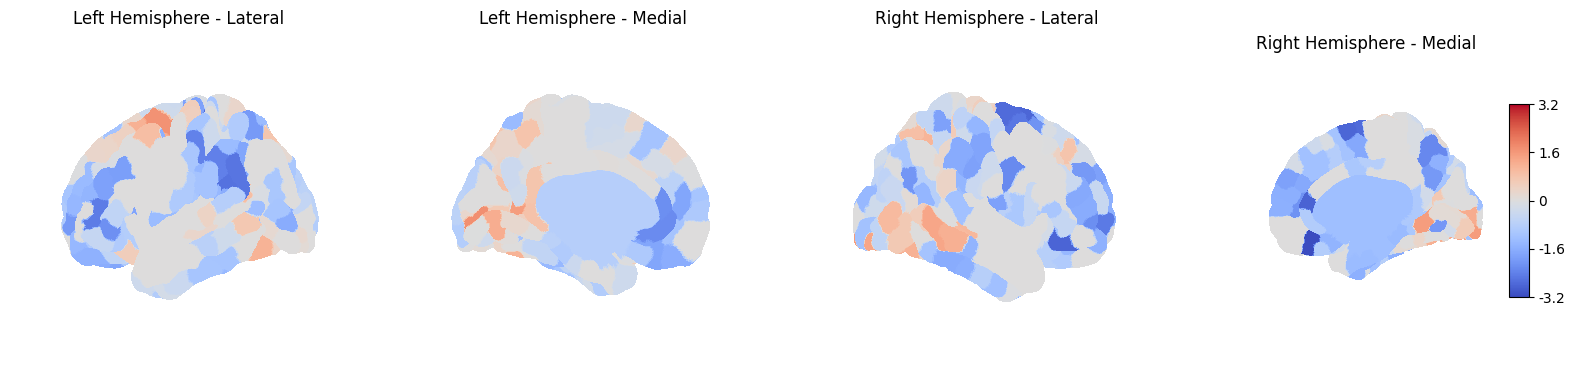

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne import read_labels_from_annot
from nilearn import plotting, surface

def plot_tvalues_on_fsaverage(tvalues, region_names, FS_SUBJDIR):
    # Use the FS_SUBJDIR directly as the FreeSurfer subjects directory
    fsaverage_dir = os.path.join(FS_SUBJDIR, 'fsaverage')
    if not os.path.exists(fsaverage_dir):
        raise FileNotFoundError("fsaverage directory not found in subjects directory")

    # Read the labels from the aparc_sub parcellation
    labels = read_labels_from_annot('fsaverage', parc='aparc_sub', subjects_dir=FS_SUBJDIR)
    
    # Create dictionaries for the t-values for each hemisphere
    lh_tvalues = np.zeros(163842)  # fsaverage has 163842 vertices per hemisphere
    rh_tvalues = np.zeros(163842)

    # Map t-values to vertices
    region_tvalues = dict(zip(region_names, tvalues))

    for label in labels:
        if label.name in region_tvalues:
            if label.hemi == 'lh':
                lh_tvalues[label.vertices] = region_tvalues[label.name]
            elif label.hemi == 'rh':
                rh_tvalues[label.vertices] = region_tvalues[label.name]

    # Paths to the fsaverage pial surfaces
    pial_left = os.path.join(fsaverage_dir, 'surf', 'lh.pial')
    pial_right = os.path.join(fsaverage_dir, 'surf', 'rh.pial')

    # Load the surfaces
    pial_left_surf = surface.load_surf_mesh(pial_left)
    pial_right_surf = surface.load_surf_mesh(pial_right)

    # Extract coordinates and faces
    pial_left_coords, pial_left_faces = pial_left_surf
    pial_right_coords, pial_right_faces = pial_right_surf

    # Plot the t-values on fsaverage surfaces
    fig, axes = plt.subplots(1, 4, subplot_kw={'projection': '3d'}, figsize=(20, 5))

    plotting.plot_surf_stat_map((pial_left_coords, pial_left_faces), lh_tvalues,
                                hemi='left', view='lateral', axes=axes[0],
                                colorbar=False, title='Left Hemisphere - Lateral',
                                cmap='coolwarm')
    plotting.plot_surf_stat_map((pial_left_coords, pial_left_faces), lh_tvalues,
                                hemi='left', view='medial', axes=axes[1],
                                colorbar=False, title='Left Hemisphere - Medial',
                                cmap='coolwarm')
    plotting.plot_surf_stat_map((pial_right_coords, pial_right_faces), rh_tvalues,
                                hemi='right', view='lateral', axes=axes[2],
                                colorbar=False, title='Right Hemisphere - Lateral',
                                cmap='coolwarm')
    plotting.plot_surf_stat_map((pial_right_coords, pial_right_faces), rh_tvalues,
                                hemi='right', view='medial', axes=axes[3],
                                colorbar=False, title='Right Hemisphere - Medial',
                                cmap='coolwarm')

    plt.show()


# Example usage

plot_tvalues_on_fsaverage(tvals_freq[2,:], region_names, FS_SUBJDIR)


In [7]:
FS_SUBJDIR

'/media/hyruuk/YH_storage/DATA/saflow/fs_subjects'

In [21]:
region_names

['isthmuscingulate_2-rh',
 'precuneus_2-rh',
 'precuneus_3-rh',
 'pericalcarine_3-lh',
 'lingual_5-lh',
 'lingual_6-lh',
 'lingual_7-rh',
 'pericalcarine_1-rh',
 'lingual_6-rh',
 'precuneus_11-lh',
 'isthmuscingulate_3-lh',
 'precuneus_4-rh',
 'cuneus_1-rh',
 'precuneus_1-rh',
 'isthmuscingulate_2-lh',
 'precuneus_10-lh',
 'unknown-lh',
 'postcentral_1-rh',
 'precentral_1-rh',
 'precentral_2-rh',
 'parsopercularis_3-rh',
 'precentral_16-lh',
 'postcentral_14-lh',
 'precentral_3-rh',
 'supramarginal_9-rh',
 'postcentral_2-rh',
 'postcentral_13-lh',
 'caudalmiddlefrontal_5-rh',
 'rostralmiddlefrontal_1-rh',
 'superiorfrontal_12-lh',
 'precentral_9-lh',
 'precentral_4-lh',
 'caudalmiddlefrontal_6-lh',
 'superiorfrontal_17-lh',
 'superiorfrontal_7-rh',
 'superiorfrontal_9-rh',
 'caudalmiddlefrontal_5-lh',
 'superiorfrontal_6-rh',
 'superiorfrontal_8-rh',
 'superiorfrontal_13-lh',
 'superiorfrontal_10-rh',
 'superiorfrontal_13-rh',
 'superiorfrontal_11-lh',
 'superiorfrontal_9-lh',
 'superi

    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot


    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
Reading labels from parcellation...
   read 226 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /media/hyruuk/YH_storage/DATA/saflow/fs_subjects/fsaverage/label/rh.aparc_sub.annot
